**Objective**
* EDA and Visualization

**About this dataset**
* **Age** : Age of the patient
* **Sex** : Sex of the patient
* **exang** : exercise induced angina (1 = yes; 0 = no)
* **ca** : number of major vessels (0-3)
* **cp** : Chest Pain type chest pain type
    * **Value 0**: typical angina
    * **Value 1**: atypical angina
    * **Value 2**: non-anginal pain
    * **Value 3**: asymptomatic
* **trtbps** : resting blood pressure (in mm Hg)
* **chol** : cholestoral in mg/dl fetched via BMI sensor
* **fbs** : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
* **rest_ecg** : resting electrocardiographic results
    * **Value 0**: normal
    * **Value 1**: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    * **Value 2**: showing probable or definite left ventricular hypertrophy by Estes' criteria
* **thalach** : maximum heart rate achieved
* **target** : 0 = less chance of heart attack 1= more chance of heart attack

----
## Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
plt.style.use('seaborn-whitegrid')
pd.set_option('display.max_columns', 500)
sns.set_palette('pastel')

------
<h3>Helper Functions</h3>

In [2]:
# Summarize Numeric Feature
def numeric_summarize(data, x):
    # Get Stats Informations
    mx = data[x].max()
    mn = data[x].min()
    avg = data[x].mean()
    
    print(f"Max = {mx}\nMin = {mn}\nMean = {avg}")
    
    # Plot
    plt.figure(figsize = (20, 7))
    # Box Plot 
    plt.subplot(1, 2, 1)
    sns.boxplot(x = data[x])
    # Dist plot
    plt.subplot(1, 2, 2)
    sns.histplot(x = data[x], kde = True, color = 'red', bins = 10)
    

-----

In [3]:
data = pd.read_csv('heart.csv')

In [4]:
# Let's convert data to better visualization
data['sex'] = data['sex'].map({1: 'Male', 0: 'Female'})

In [5]:
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,Male,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,Male,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,Female,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,Male,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,Female,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    object 
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(12), object(1)
memory usage: 33.3+ KB


In [7]:
data.isna().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

<AxesSubplot:xlabel='output', ylabel='count'>

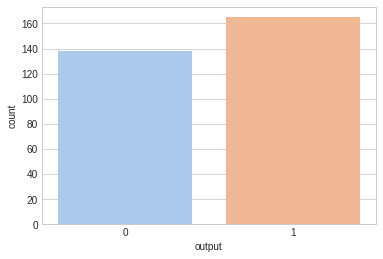

In [8]:
# Check That is Balanced Dataset or not ?
sns.countplot(x = data['output'])

In [9]:
(data['output'].value_counts() / len(data['output'])) * 100

1    54.455446
0    45.544554
Name: output, dtype: float64

**Observation**
* There is No `NULL` Data
* There is `303` Row
* **Features**: Numeric(13), object(1) = `Total: 14`
* Dataset is almost Balanced `54.45%` Have Heart Attack and `45.54%` Don't Have Heart Attack

-----
<h3>Age</h3>

Max = 77
Min = 29
Mean = 54.366336633663366


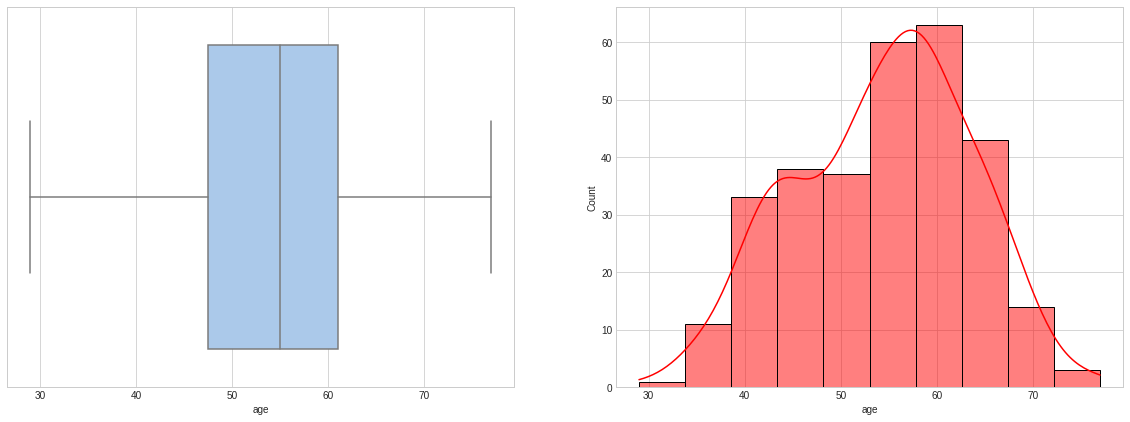

In [10]:
numeric_summarize(data, 'age')

In [11]:
# Who have Min age ?
data[ data['age'] == data['age'].min() ]

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
72,29,Male,1,130,204,0,0,202,0,0.0,2,0,2,1


In [12]:
# Who have Max age ?
data[ data['age'] == data['age'].max() ]

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
238,77,Male,0,125,304,0,0,162,1,0.0,2,3,2,0


<AxesSubplot:xlabel='age', ylabel='Density'>

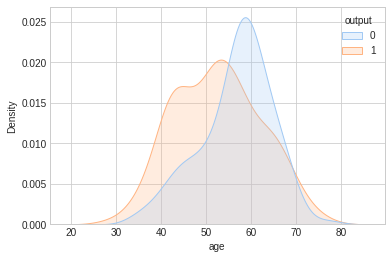

In [13]:
# Distribution of age and have heart attack ?
sns.kdeplot(x = data['age'], hue = data['output'], shade = True)

<div class="alert alert-info">
    To make sure that Older people is less chance to face Heart attack
</div>

In [14]:
# Check that Older people less than younger People to Face heart attack
# If Person is less than 50 he is consdered as young otherwise Older
def convert(x):
    if x < 50:
        return 'young'
    else:
        return 'old'
    
d = data.copy()
d['Age Status'] = d['age'].map(lambda x: convert(x))
d.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output,Age Status
0,63,Male,3,145,233,1,0,150,0,2.3,0,0,1,1,old
1,37,Male,2,130,250,0,1,187,0,3.5,0,0,2,1,young
2,41,Female,1,130,204,0,0,172,0,1.4,2,0,2,1,young
3,56,Male,1,120,236,0,1,178,0,0.8,2,0,2,1,old
4,57,Female,0,120,354,0,1,163,1,0.6,2,0,2,1,old


Text(1.1749999999999972, 0.5, 'P ( Heart Attack ) ')

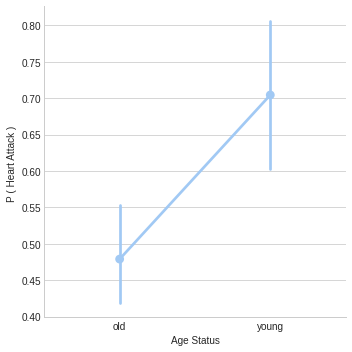

In [15]:
# Who is Highst Propability ?
sns.catplot(data = d, x = 'Age Status', y = 'output', kind = 'point')
plt.ylabel("P ( Heart Attack ) ")

<AxesSubplot:xlabel='age', ylabel='thalachh'>

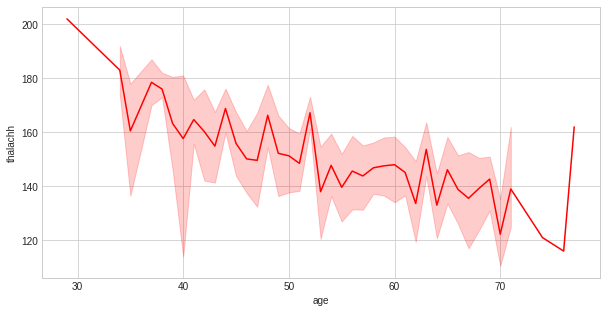

In [16]:
plt.figure(figsize = (10, 5))
sns.lineplot(x = data['age'], y = data['thalachh'], color = 'red')

**Observation**
* Age seems to be uniform distributed
* Age doesn't have outliers
* Min age is A Male have 29 Years old and have Heart Attack
* Max age is A Male have 77 years old and doesn't have Heart Attack
* Less people face heart attacks than older people 
* Young people are the more people that face Heart attack
* Decreasing in age face decrasing in Heart Rate

----
<h3>Sex</h3>

<AxesSubplot:xlabel='sex', ylabel='count'>

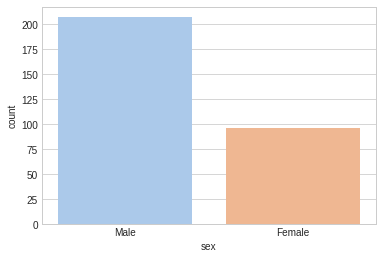

In [17]:
sns.countplot(x = data['sex'])

<div class="alert alert-info"> Due to Number of males is greater than Number of females 
We will take random Samples to compare between the chance between Male and Female to get heart attack
</div>

In [18]:
# Let's take a sample 
males = data[ data['sex'] == 'Male' ].sample(50)
females = data[ data['sex'] == 'Female' ].sample(50)
d = pd.concat([males, females])

<AxesSubplot:xlabel='sex', ylabel='count'>

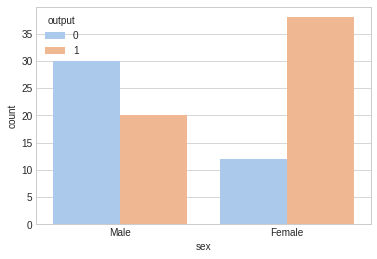

In [19]:
# Check that Output is almost the same for each Samples
sns.countplot(x = d['sex'], hue = data['output'])

Text(6.799999999999997, 0.5, 'P ( Heart Attack ) ')

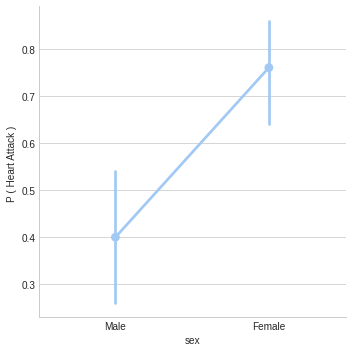

In [20]:
# Who is Highst Propability ?
sns.catplot(data = d, x = 'sex', y = 'output', kind = 'point')
plt.ylabel("P ( Heart Attack ) ")

**Observation**
* Number of Males is greater than Number of Females
* Probability of Heart Attack for Female is greater than Males
    * `Due To Some Research in Medical Domain I Found that is a Fact`
* `Sex Feature` will be a Good Feature while Classification Process

----
<h3>Chest Pain</h3>

<AxesSubplot:xlabel='cp', ylabel='count'>

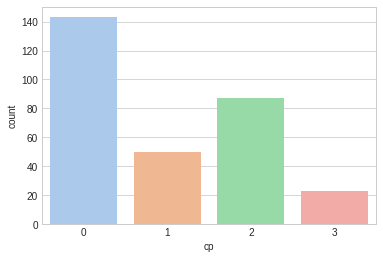

In [21]:
sns.countplot(x = data['cp'])

<AxesSubplot:xlabel='cp', ylabel='count'>

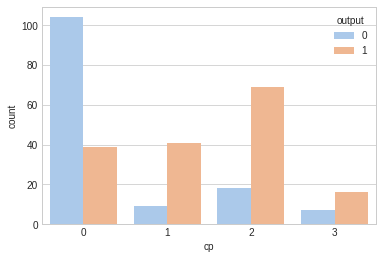

In [77]:
sns.countplot(x = data['cp'], hue = data['output'])

**Observation**
* Our dataset is not distributed over 4 Types of chest pain
* Our dataset say that People with Chest pain type 2 have a high rate to get Heart attack

------
<h3>Blood Pressure</h3>

In [22]:
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,Male,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,Male,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,Female,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,Male,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,Female,0,120,354,0,1,163,1,0.6,2,0,2,1


Max = 200
Min = 94
Mean = 131.62376237623764


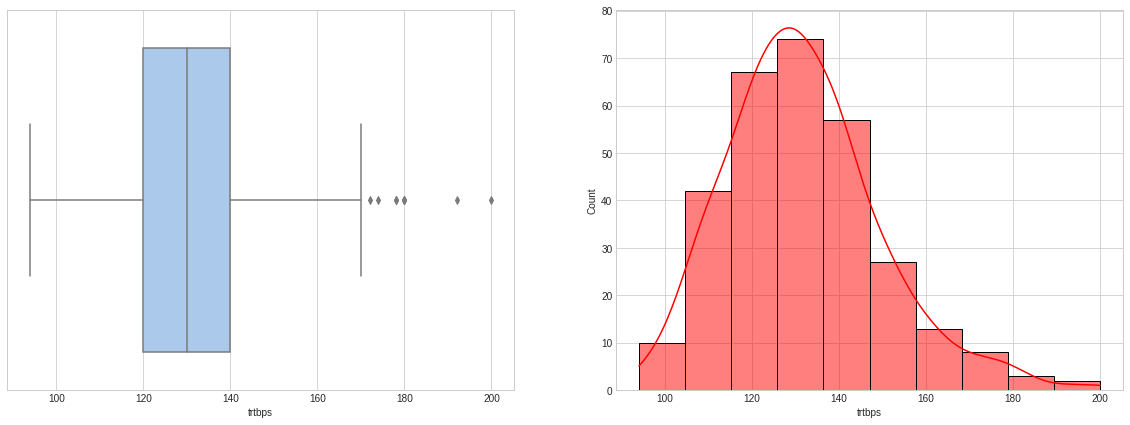

In [23]:
numeric_summarize(data = data, x = 'trtbps')

<AxesSubplot:xlabel='trtbps', ylabel='Density'>

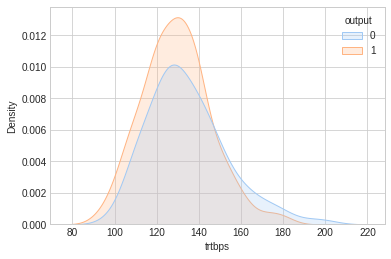

In [24]:
# Blood Preasure and The chance to get Heart Attack ?
sns.kdeplot(x = data['trtbps'], hue = data['output'], shade = True)

**Observation**
* Plood Presure have outliers
* People That Have Low Blood Preasure Have More Chance to Face Heart attack than High Blood Preasure

----
<h3>Cholestoral</h3>

data.head()

Max = 564
Min = 126
Mean = 246.26402640264027


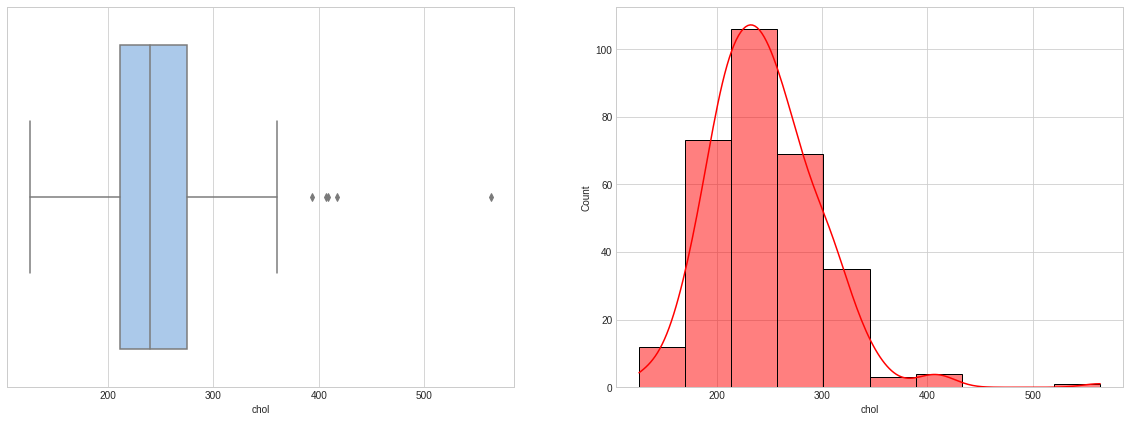

In [25]:
numeric_summarize(data = data, x = 'chol')

<AxesSubplot:xlabel='chol', ylabel='Density'>

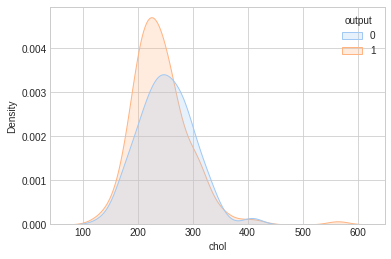

In [26]:
# Cholestoral and The chance to get Heart Attack ?
sns.kdeplot(x = data['chol'], hue = data['output'], shade = True)

<AxesSubplot:xlabel='chol', ylabel='trtbps'>

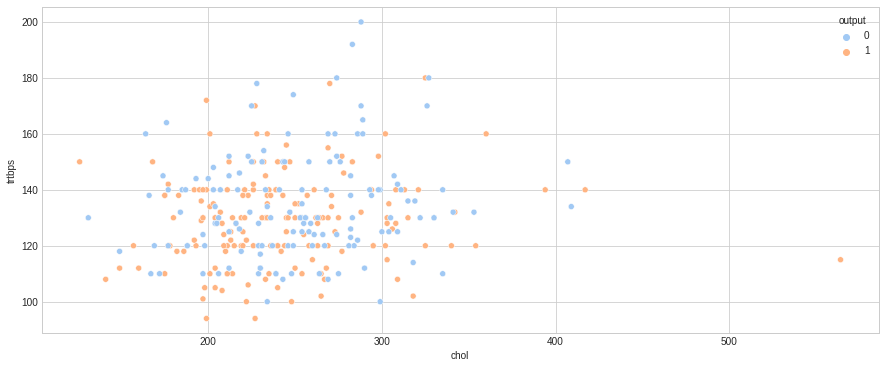

In [27]:
# Cholestoral vs Blood Preasure
plt.figure(figsize=(15, 6))
sns.scatterplot(x = data['chol'], y = data['trtbps'], hue = data['output'])

**Observation**
* Cholestoral Have outliers
* It Seem that People we have Cholestoral less that 200 have less chance to Face Heart attack 
* We cannot Calssify The Heart Attack Based on Cholestoral and Blood Preasure

-----
<h3>Fasting Blood Sugar</h3>

<AxesSubplot:xlabel='fbs', ylabel='count'>

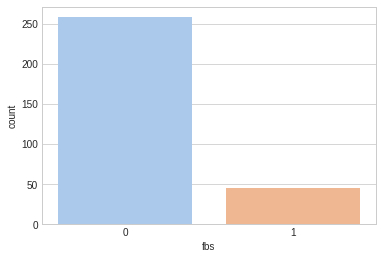

In [28]:
sns.countplot(x = data['fbs'])

<div class="alert alert-warning"> There is unbalance in FBS 
</div>

In [29]:
one = data[ data['fbs'] == 1 ].sample(45)
zero = data[ data['fbs'] == 0 ].sample(45)

In [73]:
conc = pd.concat([one, zero])

<AxesSubplot:xlabel='output', ylabel='count'>

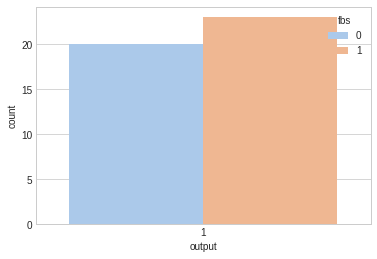

In [31]:
# Is diabetes affect Heart Attack ?
sns.countplot(x = conc[ conc['output'] == 1 ]['output'], hue = conc['fbs'])

**Observation**
* FBS is Unbalance in our dataset so We take a samples from our dataset
* Number of Zeros in FBS is very large
* After taking Samples we found that `People who have diabetes is more likely to face heart attack`

----
<h3>Rest Ecg</h3>

In [32]:
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,Male,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,Male,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,Female,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,Male,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,Female,0,120,354,0,1,163,1,0.6,2,0,2,1


<AxesSubplot:xlabel='restecg', ylabel='count'>

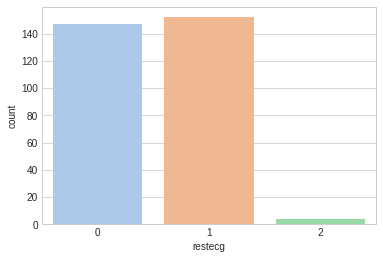

In [33]:
# Is distributed ?
sns.countplot(x = data['restecg'])

<div class="alert alert-warning"> 
    There is unbalance in FBS we cannot give a cat 
</div>

**Observation**
* restecg is not distributed

----
<h3>Max Heart Rate Achived</h3>

In [34]:
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,Male,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,Male,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,Female,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,Male,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,Female,0,120,354,0,1,163,1,0.6,2,0,2,1


Max = 202
Min = 71
Mean = 149.64686468646866


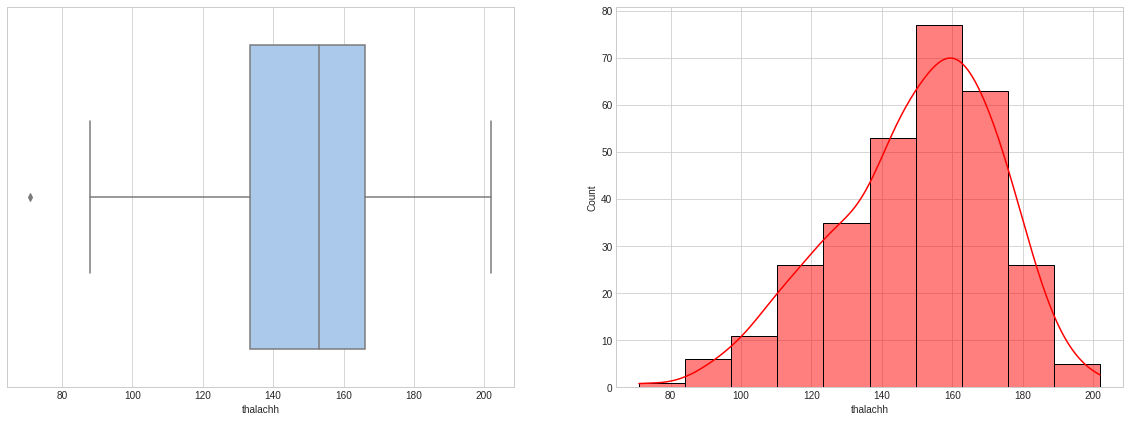

In [35]:
numeric_summarize(data = data, x = 'thalachh')

<AxesSubplot:xlabel='thalachh', ylabel='Density'>

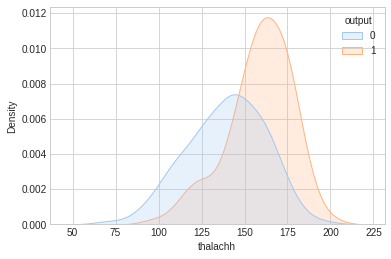

In [36]:
sns.kdeplot(x = data['thalachh'], hue = data['output'],shade = True)

**Observation**
* `Max Heart Rate > 150` is more likely to face Heart Attack

----
<h3>Exang</h3>

In [48]:
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,Male,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,Male,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,Female,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,Male,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,Female,0,120,354,0,1,163,1,0.6,2,0,2,1


<AxesSubplot:xlabel='exng', ylabel='count'>

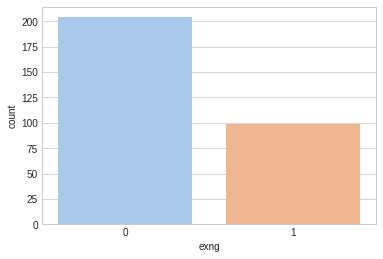

In [49]:
# is exang feature balanced ?
sns.countplot(x = data['exng'])

<div class="alert alert-warning"> 
    There is unbalance in exng
</div>

In [52]:
# Get Samples
zero = data[ data['exng'] == 0 ].sample(99)
one = data[ data['exng'] == 1 ].sample(99)
conc = pd.concat([zero, one])

<AxesSubplot:xlabel='exng', ylabel='count'>

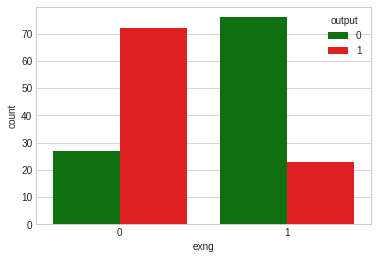

In [59]:
sns.countplot(x = conc['exng'], hue = conc['output'], palette=['green', 'red'])

**Observation**
* People Who exercise induced angina may not face heart attack 
* People Who `not` exercise induced angina is the most likely to face Heart attack

----
<h3>Old Peak</h3>

In [64]:
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,Male,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,Male,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,Female,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,Male,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,Female,0,120,354,0,1,163,1,0.6,2,0,2,1


Max = 6.2
Min = 0.0
Mean = 1.0396039603960396


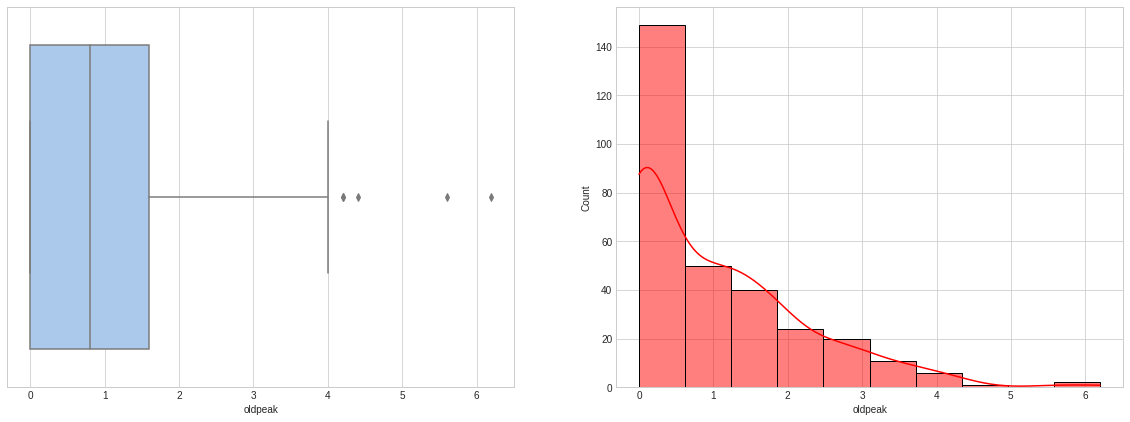

In [67]:
numeric_summarize(data = data, x = 'oldpeak')

<AxesSubplot:xlabel='oldpeak', ylabel='Density'>

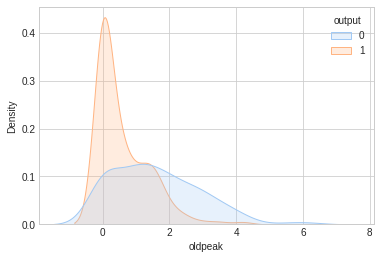

In [69]:
# Relation Between Old beak and Heart attack
sns.kdeplot(x = data['oldpeak'], hue = data['output'], shade = True)

**Observation**
* Old Peak Less than `2` is more likely to face a Heart attack
* Old Peak Greater than `2` is less likely to face a Heart attack